Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


Load the dataset

In [2]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

In [3]:
df

array([[  1. ,  85. ,  26.6,  31. ,   0. ],
       [  1. ,  89. ,  28.1,  21. ,   0. ],
       [  5. , 116. ,  25.6,  30. ,   0. ],
       ...,
       [ 13. , 104. ,  31.2,  38. ,   1. ],
       [  4. , 156. ,  48.3,  32. ,   1. ],
       [  7. , 160. ,  30.5,  39. ,   1. ]])

Splitting the dataset

In [4]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [5]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)


Build the Keras Model

In [6]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 5 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 1s 9ms/step - loss: 0.6951 - accuracy: 0.4438 - val_loss: 0.6932 - val_accuracy: 0.4955
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5228 - val_loss: 0.6915 - val_accuracy: 0.5500
Epoch 3/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.6079 - val_loss: 0.6905 - val_accuracy: 0.6273
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6049 - val_loss: 0.6898 - val_accuracy: 0.6727
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.7082 - val_loss: 0.6892 - val_accuracy: 0.6500
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.7280 - val_loss: 0.6886 - val_accuracy: 0.6545
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.7264 - val_loss: 0.6880 - val_accuracy: 0.7182
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8237 - val_loss: 0.4985 - val_accuracy: 0.7409
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8237 - val_loss: 0.4994 - val_accuracy: 0.7727
Epoch 61/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8207 - val_loss: 0.5057 - val_accuracy: 0.7409
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8222 - val_loss: 0.5109 - val_accuracy: 0.7318
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8161 - val_loss: 0.5018 - val_accuracy: 0.7182
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8146 - val_loss: 0.4992 - val_accuracy: 0.7682
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8374 - val_loss: 0.5000 - val_accuracy: 0.7636
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8799 - val_loss: 0.8724 - val_accuracy: 0.6227
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8495 - val_loss: 0.5394 - val_accuracy: 0.7636
Epoch 118/150
42/42 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8678 - val_loss: 0.5072 - val_accuracy: 0.7955
Epoch 119/150
42/42 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.8769 - val_loss: 0.6630 - val_accuracy: 0.7364
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8632 - val_loss: 0.6625 - val_accuracy: 0.7455
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8708 - val_loss: 0.5777 - val_accuracy: 0.7455
Epoch 122/150
42/42 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8708 - val_loss: 0.5048 - val_accuracy: 0.7818
Epoch 123/150

In [7]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.9195
Training Accuracy: 91.95
7/7 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.8182
Validation Accuracy: 81.82


In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [9]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 4 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 1s 9ms/step - loss: 0.7014 - accuracy: 0.5030 - val_loss: 0.6914 - val_accuracy: 0.4864
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5046 - val_loss: 0.6783 - val_accuracy: 0.5091
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.5426 - val_loss: 0.6678 - val_accuracy: 0.5318
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6307 - val_loss: 0.6587 - val_accuracy: 0.6000
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6839 - val_loss: 0.6494 - val_accuracy: 0.6818
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.7082 - val_loss: 0.6402 - val_accuracy: 0.6909
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7264 - val_loss: 0.6315 - val_accuracy: 0.6909
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8100 - val_loss: 0.5203 - val_accuracy: 0.7273
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8146 - val_loss: 0.5186 - val_accuracy: 0.7318
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.8116 - val_loss: 0.5191 - val_accuracy: 0.7364
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8100 - val_loss: 0.5180 - val_accuracy: 0.7273
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8070 - val_loss: 0.5166 - val_accuracy: 0.7227
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8070 - val_loss: 0.5170 - val_accuracy: 0.7364
Epoch 65/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8100 - val_loss: 0.5160 - val_accuracy: 0.7318
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8252 - val_loss: 0.5052 - val_accuracy: 0.7773
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8283 - val_loss: 0.5020 - val_accuracy: 0.7682
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8313 - val_loss: 0.5056 - val_accuracy: 0.7773
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8359 - val_loss: 0.5056 - val_accuracy: 0.7727
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8313 - val_loss: 0.5043 - val_accuracy: 0.7682
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8298 - val_loss: 0.5170 - val_accuracy: 0.7727
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8313 - val_loss: 0.5046 - val_accuracy: 0.7727
Epoch 123/150

In [10]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8632
Training Accuracy: 86.32
7/7 [==============================] - 0s 997us/step - loss: 0.4951 - accuracy: 0.7773
Validation Accuracy: 77.73


In [11]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 3 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 10ms/step - loss: 0.6613 - accuracy: 0.6550 - val_loss: 0.6647 - val_accuracy: 0.6500
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7112 - val_loss: 0.6470 - val_accuracy: 0.6864
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7508 - val_loss: 0.6287 - val_accuracy: 0.7045
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7720 - val_loss: 0.6119 - val_accuracy: 0.7045
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7720 - val_loss: 0.5958 - val_accuracy: 0.6955
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7766 - val_loss: 0.5810 - val_accuracy: 0.6864
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7705 - val_loss: 0.5680 - val_accuracy: 0.6909
Epoch 8/150


Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8100 - val_loss: 0.4982 - val_accuracy: 0.7500
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8100 - val_loss: 0.4959 - val_accuracy: 0.7455
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8131 - val_loss: 0.4991 - val_accuracy: 0.7500
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8146 - val_loss: 0.4980 - val_accuracy: 0.7455
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8100 - val_loss: 0.4971 - val_accuracy: 0.7364
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8024 - val_loss: 0.4950 - val_accuracy: 0.7455
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8131 - val_loss: 0.4956 - val_accuracy: 0.7455
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8207 - val_loss: 0.4723 - val_accuracy: 0.8000
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8267 - val_loss: 0.4724 - val_accuracy: 0.7818
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8207 - val_loss: 0.4733 - val_accuracy: 0.7773
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8207 - val_loss: 0.4777 - val_accuracy: 0.7455
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8207 - val_loss: 0.4757 - val_accuracy: 0.7455
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8252 - val_loss: 0.4671 - val_accuracy: 0.7909
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8267 - val_loss: 0.4707 - val_accuracy: 0.7955
Epoch 123/150

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8465
Training Accuracy: 84.65
7/7 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7818
Validation Accuracy: 78.18


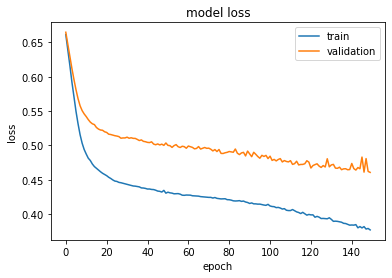

In [14]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 2 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 6ms/step - loss: 0.6888 - accuracy: 0.5274 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5836 - val_loss: 0.6883 - val_accuracy: 0.5409
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5988 - val_loss: 0.6862 - val_accuracy: 0.5455
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6429 - val_loss: 0.6840 - val_accuracy: 0.5864
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6687 - val_loss: 0.6814 - val_accuracy: 0.6318
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6915 - val_loss: 0.6784 - val_accuracy: 0.6545
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6991 - val_loss: 0.6750 - val_accuracy: 0.6636
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7872 - val_loss: 0.5178 - val_accuracy: 0.7409
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7903 - val_loss: 0.5162 - val_accuracy: 0.7409
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7888 - val_loss: 0.5169 - val_accuracy: 0.7409
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7918 - val_loss: 0.5166 - val_accuracy: 0.7409
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7903 - val_loss: 0.5164 - val_accuracy: 0.7364
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7903 - val_loss: 0.5149 - val_accuracy: 0.7455
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7948 - val_loss: 0.5152 - val_accuracy: 0.7409
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8055 - val_loss: 0.4901 - val_accuracy: 0.7500
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8100 - val_loss: 0.4907 - val_accuracy: 0.7455
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8100 - val_loss: 0.4914 - val_accuracy: 0.7364
Epoch 119/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8070 - val_loss: 0.4917 - val_accuracy: 0.7500
Epoch 120/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8070 - val_loss: 0.4925 - val_accuracy: 0.7500
Epoch 121/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8070 - val_loss: 0.4903 - val_accuracy: 0.7545
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8116 - val_loss: 0.4901 - val_accuracy: 0.7545
Epoch 123/150

In [16]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8176
Training Accuracy: 81.76
7/7 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7636
Validation Accuracy: 76.36


In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 1 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 6ms/step - loss: 0.7461 - accuracy: 0.4574 - val_loss: 0.7148 - val_accuracy: 0.5227
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.4681 - val_loss: 0.7016 - val_accuracy: 0.5455
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5046 - val_loss: 0.6923 - val_accuracy: 0.5955
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5942 - val_loss: 0.6857 - val_accuracy: 0.6136
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6322 - val_loss: 0.6798 - val_accuracy: 0.6591
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6733 - val_loss: 0.6736 - val_accuracy: 0.7091
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7158 - val_loss: 0.6670 - val_accuracy: 0.7227
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7751 - val_loss: 0.5190 - val_accuracy: 0.7091
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7766 - val_loss: 0.5178 - val_accuracy: 0.7136
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7781 - val_loss: 0.5174 - val_accuracy: 0.7182
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7766 - val_loss: 0.5165 - val_accuracy: 0.7182
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7766 - val_loss: 0.5161 - val_accuracy: 0.7227
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7751 - val_loss: 0.5149 - val_accuracy: 0.7227
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7751 - val_loss: 0.5145 - val_accuracy: 0.7227
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7979 - val_loss: 0.4960 - val_accuracy: 0.7500
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.7979 - val_loss: 0.4958 - val_accuracy: 0.7500
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7979 - val_loss: 0.4958 - val_accuracy: 0.7500
Epoch 119/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.7979 - val_loss: 0.4958 - val_accuracy: 0.7545
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7994 - val_loss: 0.4960 - val_accuracy: 0.7545
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7918 - val_loss: 0.4942 - val_accuracy: 0.7500
Epoch 122/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7979 - val_loss: 0.4947 - val_accuracy: 0.7545
Epoch 123/150

In [19]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8116
Training Accuracy: 81.16
7/7 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7455
Validation Accuracy: 74.55


In [20]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# NO hidden layers
# define the keras model
model = Sequential()

model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 8ms/step - loss: 0.7696 - accuracy: 0.4027 - val_loss: 0.7761 - val_accuracy: 0.4318
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.4590 - val_loss: 0.7499 - val_accuracy: 0.4500
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.5046 - val_loss: 0.7306 - val_accuracy: 0.4818
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5486 - val_loss: 0.7159 - val_accuracy: 0.5091
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5897 - val_loss: 0.7033 - val_accuracy: 0.5455
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6292 - val_loss: 0.6917 - val_accuracy: 0.5636
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6657 - val_loss: 0.6805 - val_accuracy: 0.6000
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7660 - val_loss: 0.5258 - val_accuracy: 0.7136
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7690 - val_loss: 0.5253 - val_accuracy: 0.7136
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7660 - val_loss: 0.5250 - val_accuracy: 0.7182
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7644 - val_loss: 0.5245 - val_accuracy: 0.7182
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7629 - val_loss: 0.5242 - val_accuracy: 0.7182
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7675 - val_loss: 0.5237 - val_accuracy: 0.7182
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7644 - val_loss: 0.5234 - val_accuracy: 0.7182
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7736 - val_loss: 0.5140 - val_accuracy: 0.7273
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7720 - val_loss: 0.5139 - val_accuracy: 0.7273
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7720 - val_loss: 0.5139 - val_accuracy: 0.7273
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7720 - val_loss: 0.5137 - val_accuracy: 0.7182
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7720 - val_loss: 0.5136 - val_accuracy: 0.7227
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7720 - val_loss: 0.5134 - val_accuracy: 0.7318
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7720 - val_loss: 0.5131 - val_accuracy: 0.7318
Epoch 123/150

In [22]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.7781
Training Accuracy: 77.81
7/7 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7318
Validation Accuracy: 73.18


In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()